# Movies Data Analysis & Solution Proposal

## 1. Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## 2. Load Datasets

In [2]:
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")
tags = pd.read_csv("tags.csv")
links = pd.read_csv("links.csv")

movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## 3. Merge Datasets

In [3]:
df = ratings.merge(movies, on='movieId', how='left')
df = df.merge(tags, on=['userId','movieId'], how='left')
df = df.merge(links, on='movieId', how='left')

df.head()

,userId,movieId,rating,timestamp_x,title,genres,tag,timestamp_y,imdbId,tmdbId
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,NaN,114709,862.0
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,NaN,NaN,113228,15602.0
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,NaN,NaN,113277,949.0
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,NaN,NaN,114369,807.0
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,NaN,NaN,114814,629.0


## 4. Exploratory Data Analysis

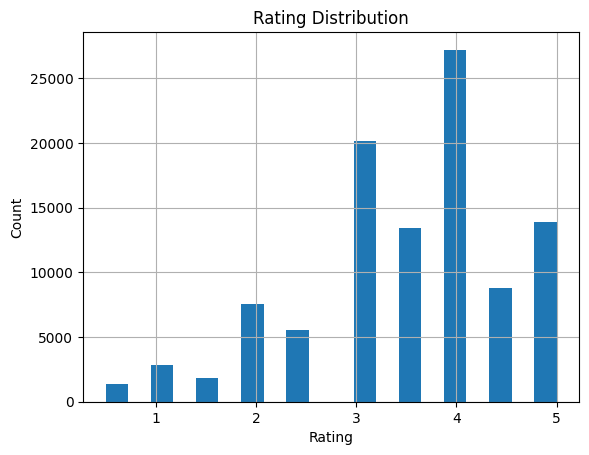

In [4]:
df['rating'].hist(bins=20)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

## 5. Genre Analysis

In [5]:
genres = df['genres'].str.split('|').explode()
genres.value_counts().head(10)

genres
Drama        43024
Comedy       39622
Action       31151
Thriller     27175
Adventure    24497
Romance      18353
Sci-Fi       17691
Crime        17224
Fantasy      11989
Children      9285
Name: count, dtype: int64

### After performing Exploratory Data Analysis (EDA) on the MovieLens dataset, it is evident that the data represents **user–movie interactions** in the form of ratings and tags. The core problem that can be addressed using this dataset is:

> **How can we recommend relevant movies to users based on historical behavior and movie characteristics?**

The dataset does not contain user demographics, so the solution must rely entirely on **implicit and explicit feedback** such as ratings, genres, and tags.
## 6. Solution Proposal

### Hybrid Recommendation System

Combines collaborative filtering, content-based filtering, and popularity-based recommendations.
To address the above challenges, a **Hybrid Recommendation System** is proposed. This system combines multiple recommendation strategies to leverage their individual strengths.
### 6.5 Components of the Hybrid System

#### 1. Collaborative Filtering (User-Based / Item-Based)

**Concept**  
Collaborative filtering recommends movies by identifying patterns in user behavior.

**Logic**
- Users with similar rating patterns are grouped together
- Movies liked by similar users are recommended

**Why used?**
- Provides personalized recommendations
- Learns from collective user behavior

**Limitation**
- Performs poorly for new users or new movies (cold start)
#### 2. Content-Based Filtering

**Concept**  
Recommends movies based on similarity between movie attributes.

**Features Used**
- Genres
- User-generated tags

**Logic**
- Convert genres and tags into feature vectors
- Recommend movies similar to those a user liked previously

**Why used?**
- Handles cold-start movies
- Does not depend on other users
- Uses semantic information from tags
#### 3. Popularity-Based Recommendation (Baseline)

**Concept**  
Recommends globally popular or highly rated movies.

**Logic**
- Rank movies based on:
  - Average rating
  - Number of ratings

**Why used?**
- Useful for new users with no history
- Acts as a fallback mechanism
### 6.6 Final Hybrid Strategy

The final recommendation logic works as follows:

1. If user has sufficient rating history:
   - Use **Collaborative Filtering**
2. If user history is limited:
   - Use **Content-Based Filtering**
3. If user is completely new:
   - Use **Popularity-Based Recommendations**
4. Combine results using weighted ranking or rule-based selection

This ensures robustness and flexibility across different user scenarios.